# Proyecto: Buscá libre libros

#### Fuente de datos
    https://www.buscalibre.com.ar/

#### Objetivo
    Analizar los datos para encontrar información relevante utilizando el método de webScrapping para recabar información sobre la elección de los lectores a la hora de seleccionar un libro y mediante el modelo de regresión poder predecir los títulos más recomendados.

#### Contexto comercial
    La libreria virtual "Busca libre" quiere saber que libros son los más populares entre los lectores, para poder recomendar a sus clientes los ejemplares con mejor calificación y poder brindar una mejor experiencia en la selección de un libro.

#### Problema comercial
    Dado que la libreria "Busca libre" es online, y no existe una persona que pueda atender las necesidades de los clientes, como la recomendación de un libro, se busca brindar una mejor experiencia a los usuarios en la selección de un libro mediante la web.

#### Contexto analítico
    Se nos presenta un dataset con todos los libros disponibles en la libreria virtual.

#### Hipótesis
    Los libros más populares son los mejores calificados y los mas comentados.
    Los libros menos populares son los peores calificados y los menos comentados.

#### Variables categóricas
    Titulo: título del libro.
    Categoría: genéro del libro.
    Autor: autor del libro.    
    Descuento: porcentaje de descuento aplicado al libro.
    Precio sin descuento: precio normal de lista, sin ninguna rebaja.
    Precio con descuento: precio de venta, con todas las rebajas aplicadas.
    Comentario: Cantidad de comentarios por libro.
    Estrellas: Calificación del libro según el lector.
    Año: año de edición del libro.
    Editorial: Editorial del libro.


# Análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

A continuación, realizamos webscrapping en la página www.buscalibre.com.ar, tomamos los libros de las primeras 5 páginas de las categorías 'Ficción' y 'Filosofía'.

In [2]:
def extract(page):
    url = requests.get(f'https://www.buscalibre.com.ar/libros/ficcion?page={page}')
    contenido = url.content
    soup = BeautifulSoup(contenido, 'html.parser')
    return soup

def transform(soup):
    divs = soup.find_all('div', class_ = 'box-producto')
    global comentario2
    for item in divs:
        titulo = item.find('h3', {'class': 'nombre margin-top-10 text-align-left'}).text.strip().replace('\n', '')
        descripcion = item.find('div', {'class': 'autor color-dark-gray metas hide-on-hover'}).text.strip().replace('\n', '')
        autor = item.find('div', {'class': 'autor'}).text.strip().replace('\n', '')
        descuento = item.find('div',{'class':'descuento-v2 color-white position-relative'}).text.strip().replace('%dcto', '')
        precio_c_dcto = item.find('p',{'class':'precio-ahora hide-on-hover margin-0 font-size-medium'}).text.strip().replace('$', '')
        precio_s_dcto = item.find('p',{'class':'precio-antes hide-on-hover margin-0 color-dark-gray font-weight-normal'}).text.strip().replace('$', '')
        
        try:
            comentario = item.find('span', {'class': 'color-dark-gray font-weight-light margin-left-5 font-size-small'}).text.strip().replace('(', '')
            comentario2= comentario.replace(')','')
            estrella = item.find('span', {'class':'small'})
            estrella2 = estrella['class'][-1]
            
        except:
            comentario = 0
            estrella2 = 0
        
        book = {
            'Titulo': titulo,
            'Descripcion' : descripcion,
            'Autor' : autor,
            'Comentario' : comentario2,
            'Descuento' : descuento,
            'Precio_c_dcto' : precio_c_dcto,
            'Precio_s_dcto' : precio_s_dcto,
            'Estrellas' : estrella2
        } 
        
        booklist.append(book)
    return

booklist=[]

for i in range(0, 100):
    c = extract(i)
    transform(c)

df_libros_ficcion = pd.DataFrame(booklist)
df_libros_ficcion['Categoria'] = 'Ficción'

In [3]:
def extract(page):
    url = requests.get(f'https://www.buscalibre.com.ar/libros/filosofia-religion/filosofia?page={page}')
    contenido = url.content
    soup = BeautifulSoup(contenido, 'html.parser')
    return soup

def transform(soup):
    divs = soup.find_all('div', class_ = 'box-producto')
    global comentario2
    for item in divs:
        titulo = item.find('h3', {'class': 'nombre margin-top-10 text-align-left'}).text.strip().replace('\n', '')
        descripcion = item.find('div', {'class': 'autor color-dark-gray metas hide-on-hover'}).text.strip().replace('\n', '')
        autor = item.find('div', {'class': 'autor'}).text.strip().replace('\n', '')
        descuento = item.find('div',{'class':'descuento-v2 color-white position-relative'}).text.strip().replace('%dcto', '')
        precio_c_dcto = item.find('p',{'class':'precio-ahora hide-on-hover margin-0 font-size-medium'}).text.strip().replace('$', '')
        precio_s_dcto = item.find('p',{'class':'precio-antes hide-on-hover margin-0 color-dark-gray font-weight-normal'}).text.strip().replace('$', '')
        
        try:
            comentario = item.find('span', {'class': 'color-dark-gray font-weight-light margin-left-5 font-size-small'}).text.strip().replace('(', '')
            comentario2= comentario.replace(')','')
            estrella = item.find('span', {'class':'small'})
            estrella2 = estrella['class'][-1]
            
        except:
            comentario = 0
            estrella2 = 0
        
        book = {
            'Titulo': titulo,
            'Descripcion' : descripcion,
            'Autor' : autor,
            'Comentario' : comentario2,
            'Descuento' : descuento,
            'Precio_c_dcto' : precio_c_dcto,
            'Precio_s_dcto' : precio_s_dcto,
            'Estrellas' : estrella2
        } 
        
        booklist.append(book)
    return

booklist=[]

for i in range(0, 100):
    c = extract(i)
    transform(c)

df_libros_filosofia = pd.DataFrame(booklist)
df_libros_filosofia['Categoria'] = 'Filosofía'

En el proceso de obtener los datasets, transformamos algunos datos.
También le indicamos que para los titulos que no tienen comentarios o calificación, los complete con 0.
Luego concatenamos ambos datasets 'Ficción' y 'Filosofía'.

In [17]:
dframes = [df_libros_ficcion, df_libros_filosofia]
df_libros = pd.concat(dframes, axis=0, ignore_index=True)
df_libros.head()

,Titulo,Descripcion,Autor,Comentario,Descuento,Precio_c_dcto,Precio_s_dcto,Estrellas,Categoria
0,Lo Nuestro fue Real,"Vergara, 2023, Tapa Blanda, Nuevo",Rosario Oyhanarte,9,10,3.784,4.204,stars-5,Ficción
1,Fortuna,"Anagrama, 2023, Tapa Blanda, Nuevo",Hernan Diaz,9,10,13.179,14.644,0,Ficción
2,Adiós Cachorra,"Planeta, 2023, Tapa Blanda, Nuevo",Lucia Numer Bellomi,3,,4.500,,stars-5,Ficción
3,Donde Todo Brilla,"Planeta, 2023, Tapa Blanda, Nuevo",Kellen Alice,1,13,6.442,7.400,stars-5,Ficción
4,La Paciente Silenciosa,"Alfaguara, 2022, Tapa Blanda, Nuevo","Michaelides, Alex",1,10,5.759,6.399,0,Ficción


Analizamos un poco los datos que tiene nuestro dataset:

In [18]:
df_libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9645 entries, 0 to 9644
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Titulo         9645 non-null   object
 1   Descripcion    9645 non-null   object
 2   Autor          9645 non-null   object
 3   Comentario     9645 non-null   object
 4   Descuento      9645 non-null   object
 5   Precio_c_dcto  9645 non-null   object
 6   Precio_s_dcto  9645 non-null   object
 7   Estrellas      9645 non-null   object
 8   Categoria      9645 non-null   object
dtypes: object(9)
memory usage: 678.3+ KB


In [19]:
df_libros['Categoria'].unique()

array(['Ficción', 'Filosofía'], dtype=object)

In [20]:
df_libros['Autor'].unique()

array(['Rosario Oyhanarte', 'Hernan Diaz', 'Lucia Numer Bellomi', ...,
       'paul radin', 'villemaire', 'george sharswood'], dtype=object)

In [21]:
df_libros['Estrellas'].unique()

array(['stars-5', 0, 'stars-4', 'stars-45', 'stars-3', 'stars-35',
       'stars-25', 'stars-2', 'stars-1'], dtype=object)

Pudimos ver que:

    Tenemos un dataset de 9644 registros.
    Los tipos de datos, son todos objects.
    Tenemos dos categorias.
    Tenemos varios tipos de estrellas.

A continuación, mapeamos la columna 'Estrellas', creando un diccionario, para tener un unico tipo:

In [22]:
dict = {'stars-5': 5, 'stars-45': 4.5, 'stars-4': 4, 'stars-35': 3.5, 'stars-3': 3, 'stars-25': 2.5,'stars-2': 2, 'stars-1': 1, '0' : 0}
df_libros['Estrellas'] = df_libros['Estrellas'].map(dict)

El campo 'Descripcion' contiene varios datos, vamos a separarlos y eliminar lo que no nos interesa, quedandonos con la 'Editorial' y el 'Año' de edición.

In [23]:
descripcion2 = df_libros["Descripcion"].str.split(',',expand=True)
descripcion2.columns = ['Editorial','Año','Edicion','Tapa','Estado', '1','2']

df_libros = pd.concat([df_libros, descripcion2], axis=1)
df_libros = df_libros.drop('Estado',axis=1)
df_libros = df_libros.drop('Tapa',axis=1)
df_libros = df_libros.drop('Edicion',axis=1)
df_libros = df_libros.drop('1',axis=1)
df_libros = df_libros.drop('2',axis=1)

Lo próximo es convertir todos las columnas de tipo object a numéricas:

In [24]:
df_libros['Comentario'] = df_libros['Comentario'].apply(pd.to_numeric, errors='coerce')
df_libros['Estrellas'] = df_libros['Estrellas'].apply(pd.to_numeric, errors='coerce')
df_libros['Descuento'] = df_libros['Descuento'].apply(pd.to_numeric, errors='coerce')
df_libros['Precio_c_dcto'] = df_libros['Precio_c_dcto'].apply(pd.to_numeric, errors='coerce')
df_libros['Precio_s_dcto'] = df_libros['Precio_s_dcto'].apply(pd.to_numeric, errors='coerce')
df_libros['Año'] = df_libros['Año'].apply(pd.to_numeric, errors='coerce')

In [25]:
df_libros = df_libros.dropna()
df_libros['Año'] = df_libros['Año'].astype(int)

In [26]:
df_libros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2383 entries, 0 to 9273
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Titulo         2383 non-null   object 
 1   Descripcion    2383 non-null   object 
 2   Autor          2383 non-null   object 
 3   Comentario     2383 non-null   int64  
 4   Descuento      2383 non-null   float64
 5   Precio_c_dcto  2383 non-null   float64
 6   Precio_s_dcto  2383 non-null   float64
 7   Estrellas      2383 non-null   float64
 8   Categoria      2383 non-null   object 
 9   Editorial      2383 non-null   object 
 10  Año            2383 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 214.1+ KB


Luego de limpiar, ordenar y transformar, quedó nuestro dataset:

In [27]:
df_libros.head()

,Titulo,Descripcion,Autor,Comentario,Descuento,Precio_c_dcto,Precio_s_dcto,Estrellas,Categoria,Editorial,Año
0,Lo Nuestro fue Real,"Vergara, 2023, Tapa Blanda, Nuevo",Rosario Oyhanarte,9,10.0,3.784,4.204,5.0,Ficción,Vergara,2023
3,Donde Todo Brilla,"Planeta, 2023, Tapa Blanda, Nuevo",Kellen Alice,1,13.0,6.442,7.400,5.0,Ficción,Planeta,2023
5,Volver a empezar (It Starts with Us),"Planeta, 2022, Tapa Blanda, Nuevo","Hoover, Colleen",1,10.0,5.670,6.300,4.0,Ficción,Planeta,2022
6,Todo lo que Nunca Fuimos,"Booket, 2022, Tapa Blanda, Nuevo",Alice Kellen,1,10.0,3.510,3.900,5.0,Ficción,Booket,2022
7,Romper el Circulo,"Planeta, 2022, Tapa Blanda, Nuevo",Colleen Hoover,11,10.0,6.030,6.700,5.0,Ficción,Planeta,2022


# Análisis Univariado

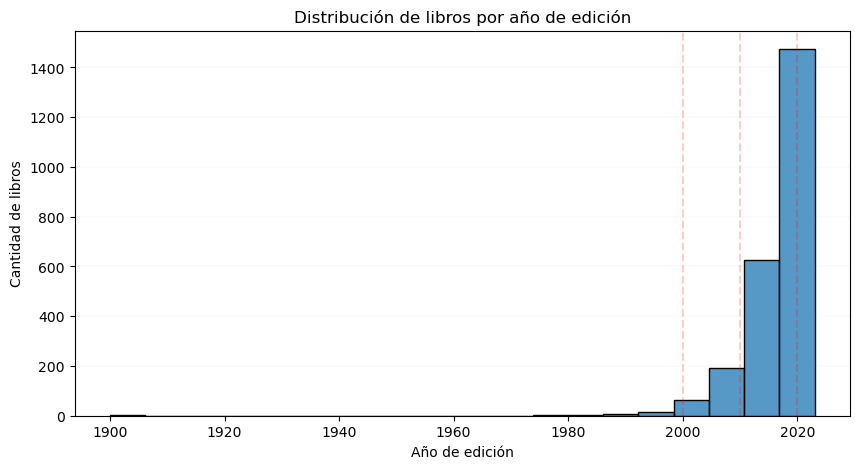

In [28]:
#Variable: Año

plt.figure(figsize=(10,5))
sns.histplot(df_libros.Año, kde=False, bins=20)

plt.xlabel('Año de edición')
plt.ylabel('Cantidad de libros')
plt.title('Distribución de libros por año de edición')

plt.axvline(x=2000, color='red', linestyle='--',alpha=0.2)
plt.axvline(x=2010, color='red', linestyle='--',alpha=0.2)
plt.axvline(x=2020, color='red', linestyle='--',alpha=0.2)

plt.grid(color='gray', linestyle='-', linewidth=0.25, alpha=0.2, axis='y')

plt.show()

En este gráfico, podemos ver que en el año 2020, fue el año que más libros se publicaron. Nos indica que en la pandemia los escritores se dedicaron a escribir mucho más que en los años anteriores.

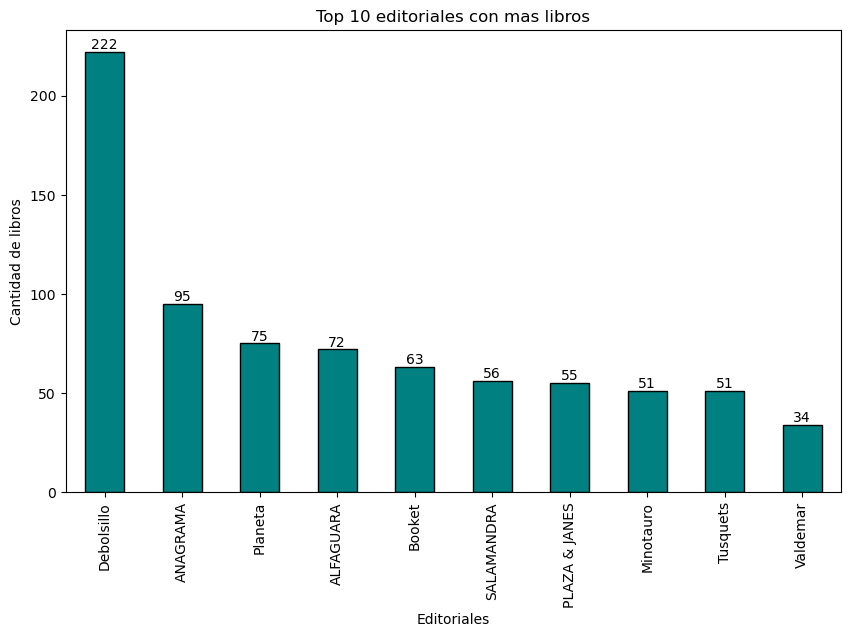

In [29]:
#Variable: Editoriales

top_editoriales = df_libros['Editorial'].value_counts().head(10)
ax = top_editoriales.plot.bar(color='teal', edgecolor='black')

ax.set_title('Top 10 editoriales con mas libros')
ax.set_xlabel('Editoriales')
ax.set_ylabel('Cantidad de libros')

for i, v in enumerate(top_editoriales.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

En este gráfico podemos analizar que las editoriales "Debolsillo" y "Anagrama" son las que más libros editan. 

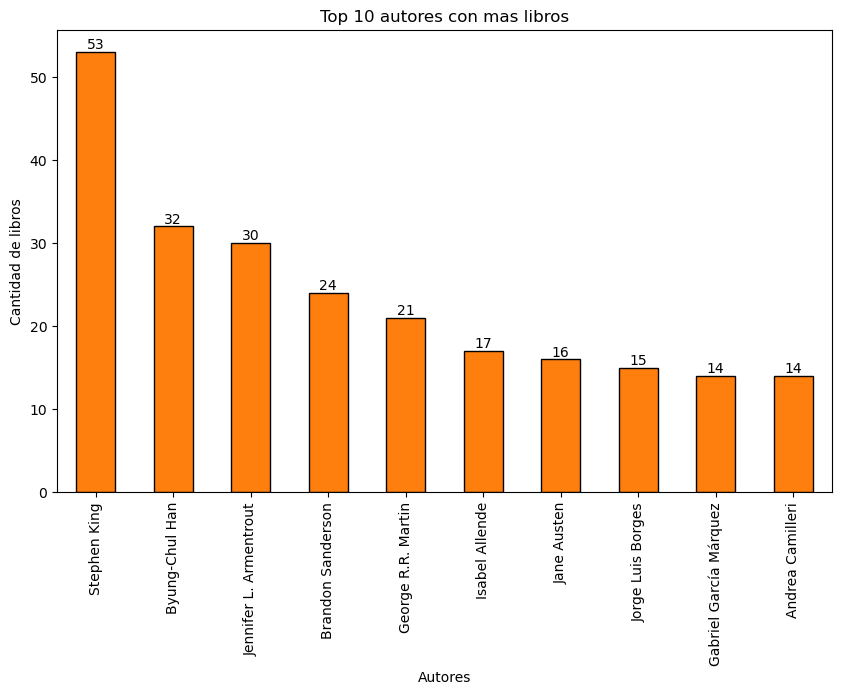

In [31]:
#Variable: Autor

top_autores = df_libros['Autor'].value_counts().head(10)
ax = top_autores.plot.bar(color='C1', edgecolor='black')

ax.set_title('Top 10 autores con mas libros')
ax.set_xlabel('Autores')
ax.set_ylabel('Cantidad de libros')

for i, v in enumerate(top_autores.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

Los autores Byung y Satephen King son los autores que más libros escribieron.

# Análisis Bivariado

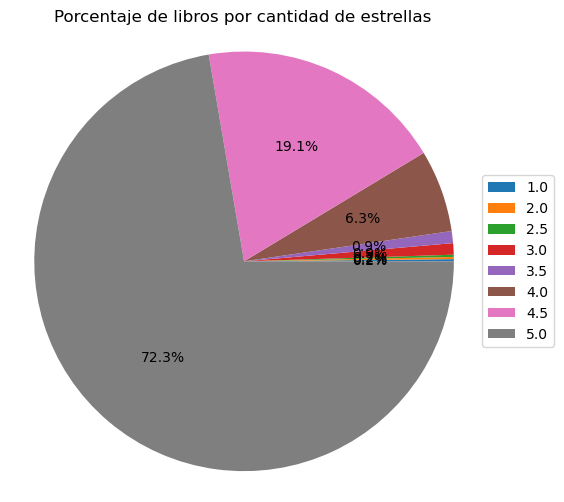

In [32]:
# Cantidad de libros según las estrellas recibidas

pie1 = df_libros.groupby('Estrellas').count().Titulo
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(pie1,autopct='%1.1f%%')
ax.legend(labels=pie1.index,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')
ax.set_title("Porcentaje de libros por cantidad de estrellas")
plt.show()



En el gráfico, podemos ver que un 72,3% de los libros tienen una calificación positiva del 5 estrellas.

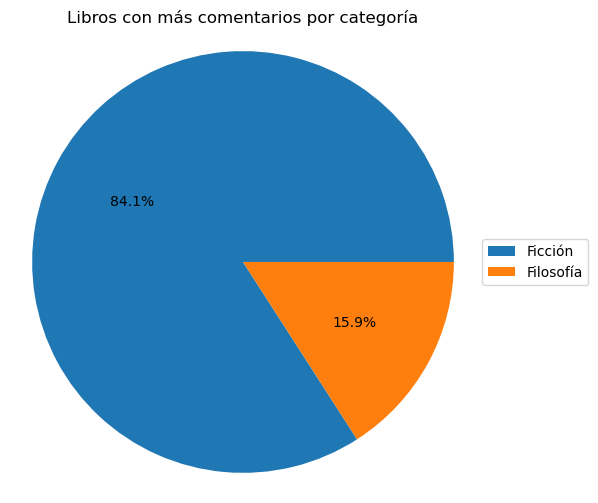

In [33]:
# Cantidad de libros según las estrellas recibidas

pie1 = df_libros.groupby('Categoria').count().Comentario
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(pie1,autopct='%1.1f%%')
ax.legend(labels=pie1.index,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')
ax.set_title("Libros con más comentarios por categoría")
plt.show()

En este gráfico podemos ver que los libros de 'Ficción' son más comentados que libros de 'Filosofía', esto nos da un pauta de que los lectores eligen la ficción sobre la filosofía.

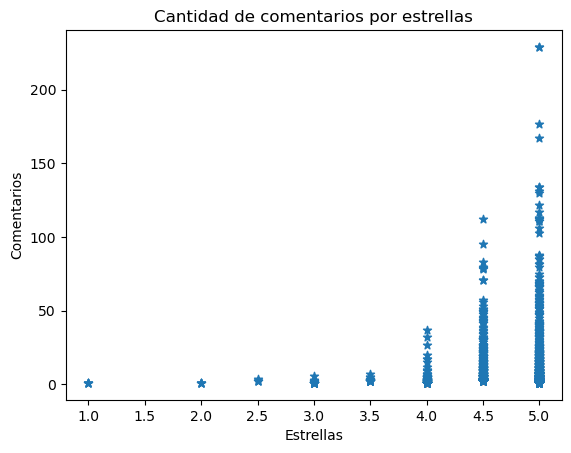

In [34]:
# Cantidad de comentarios según las estrellas recibidas

x = df_libros['Estrellas']
y = df_libros['Comentario']

# Gráfico
fig, ax = plt.subplots()

ax.scatter(x = x, y = y, marker = "*")
ax.set_title('Cantidad de comentarios por estrellas')

plt.xlabel('Estrellas')
plt.ylabel('Comentarios')

plt.show()

En este gráfico de dispersión podemos ver que los libros con 5 estrelas son más comentados, que los libros que tienen 3 estrellas. Por lo que podemos responder una de las hipótesis, donde nos preguntamos si los libros más populares entre los lectores son los más comentados.
Podemos refutar la idea de que los libros menos populares tienen comentarios negativos y pocas estrellas.

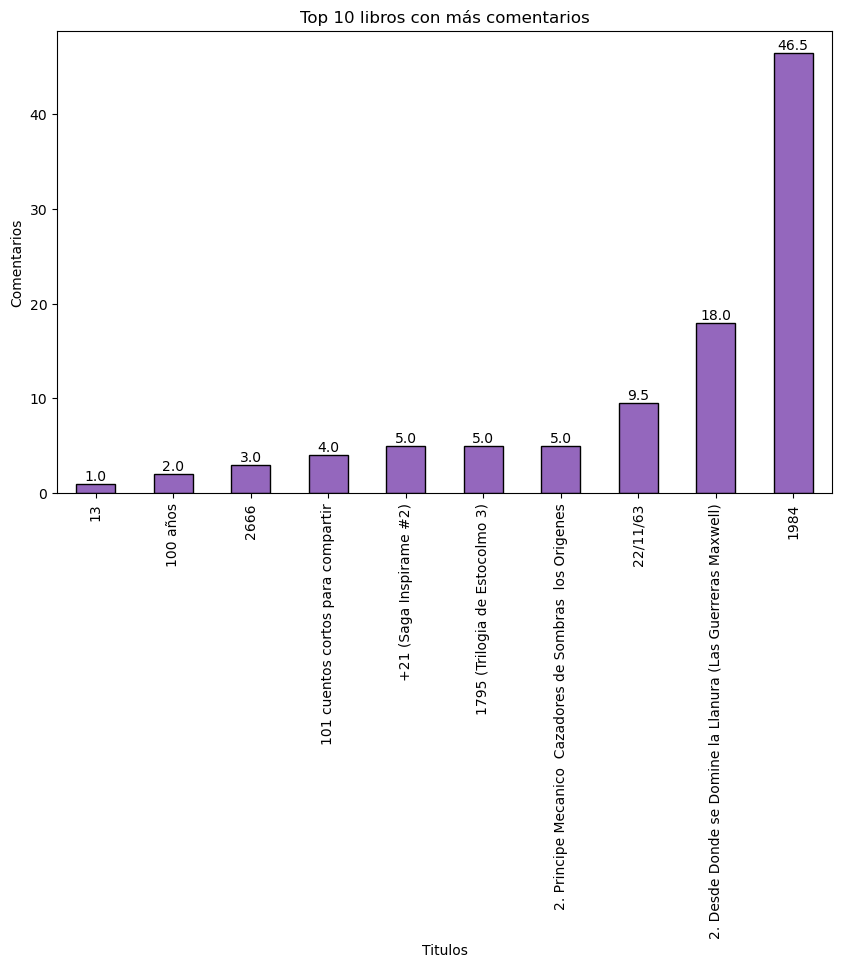

In [35]:
# Variables: libros y comentarios

top_libros = df_libros.groupby('Titulo')['Comentario'].mean().head(10).sort_values()
ax = top_libros.plot.bar(color='C4', edgecolor='black')

ax.set_title('Top 10 libros con más comentarios')
ax.set_xlabel('Titulos')
ax.set_ylabel('Comentarios')

for i, v in enumerate(top_libros.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

En el gráfico podemos ver que "Desde donde se Domine la Llanura" y "1984" son los libros más comentados.

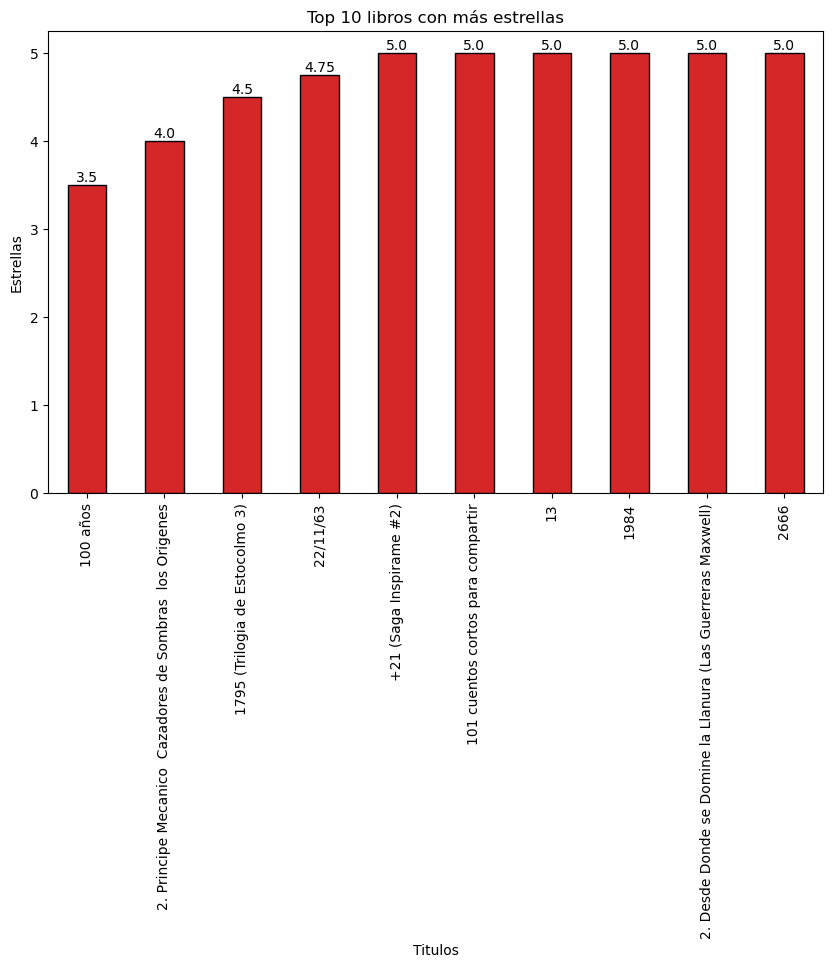

In [36]:
# Variables: libros y estrellas

top_libros = df_libros.groupby('Titulo')['Estrellas'].mean().head(10).sort_values()
ax = top_libros.plot.bar(color='C3', edgecolor='black')

ax.set_title('Top 10 libros con más estrellas')
ax.set_xlabel('Titulos')
ax.set_ylabel('Estrellas')

for i, v in enumerate(top_libros.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

En el gráfico podemos ver los 10 libros con más estrellas, y según el análisis que venimos haciendo podemos volver a ver los titulos "2666" y "1984" con 5 estrellas, que también son los libros más comentados.

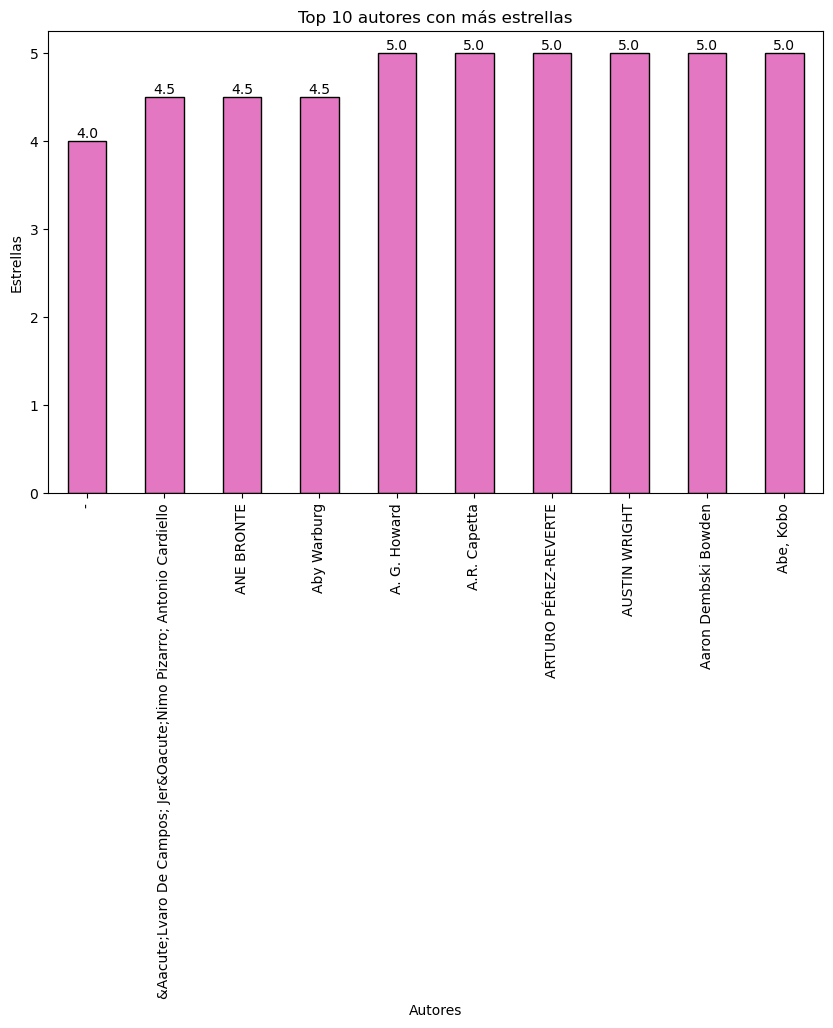

In [37]:
# Variables: Autores y estrellas

top_libros = df_libros.groupby('Autor')['Estrellas'].mean().head(10).sort_values()
ax = top_libros.plot.bar(color='C6', edgecolor='black')

ax.set_title('Top 10 autores con más estrellas')
ax.set_xlabel('Autores')
ax.set_ylabel('Estrellas')

for i, v in enumerate(top_libros.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

# Análisis Multivariado

<Figure size 768x576 with 0 Axes>

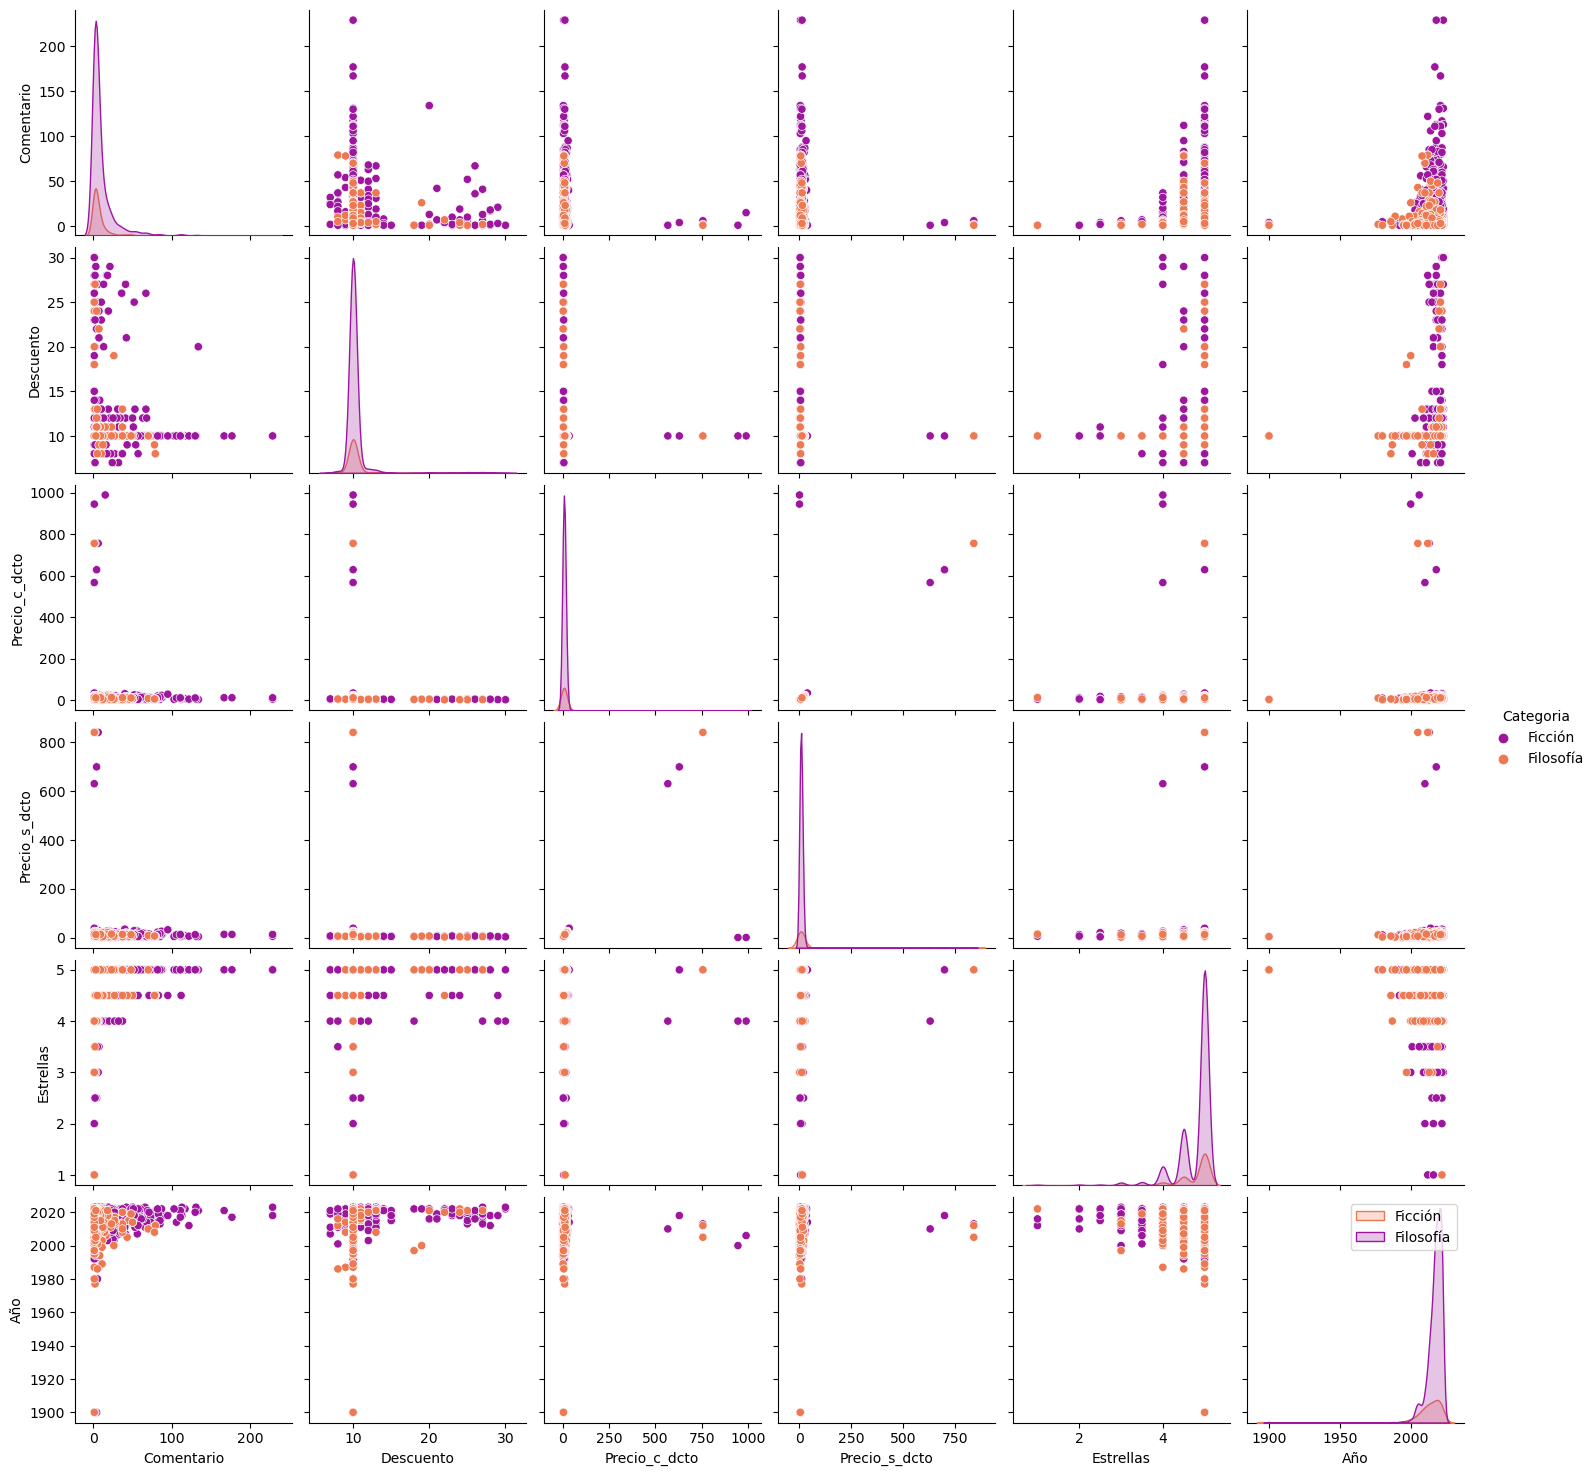

In [38]:
plt.figure(dpi = 120)
sns.pairplot(df_libros, hue = 'Categoria', palette = 'plasma')
plt.legend(['Ficción','Filosofía'])
plt.show()

En el gráfico anterior podemos ver la comparación entre libros de 'Ficción' y Filosofía':

    Podemos ver que en el año 2020, se publicaron más libros de Filosofía que de Ficción.
    También podemos observar que hubo más comentarios en los titulos en 2020 que en el resto de los años.
    Los precios con descuento fueron de manera incremental desde 1990 al 2020.
    Se observan mas comentarios y calificaciones en los libros de Ficción que en los de filosofía.
    Podemos ver que los libros de ficción tienen más descuentos que los de filosofía.
    Los libros con descuento obtienen más estrellas y más comentarios.
    
    
    

# Conclusión

Como conclusión, podemos decir que los lectores prefieren los libros de ficción a la hora de seleccionar un titulo.
En el año 2020, se detectó la mayor cantidad de publicaciones de libros.
También se pudo observar que en el año 2020, fue cuantos mas comentarios de lectores hubo, por lo que podemos decir que las ventas de libros incrementaron en pandemia.
Para finalizar la conclusión, podemos afirmar una de las hipótesis, los libros con más comentarios son los mejores calificados. Y que la web de libros debería enfocarse en recomendar esos libros.